# Gaussian Blur, Medical Images

### Import resources and display image

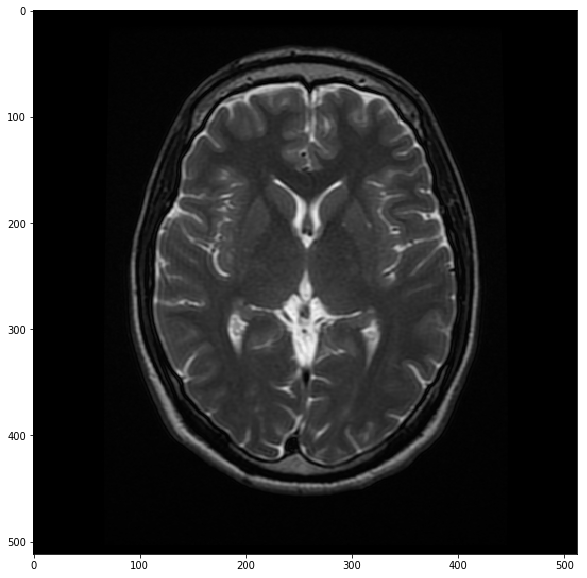

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline

# Read in the image
image = mpimg.imread('images/brain_MR.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
#image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB) --> no need if we use impimg.imread(...) 
#                                                                    instead of    cv2.imread(...)

plt.figure(figsize=(15,10))
plt.imshow(image_copy)

### Gaussian blur the image

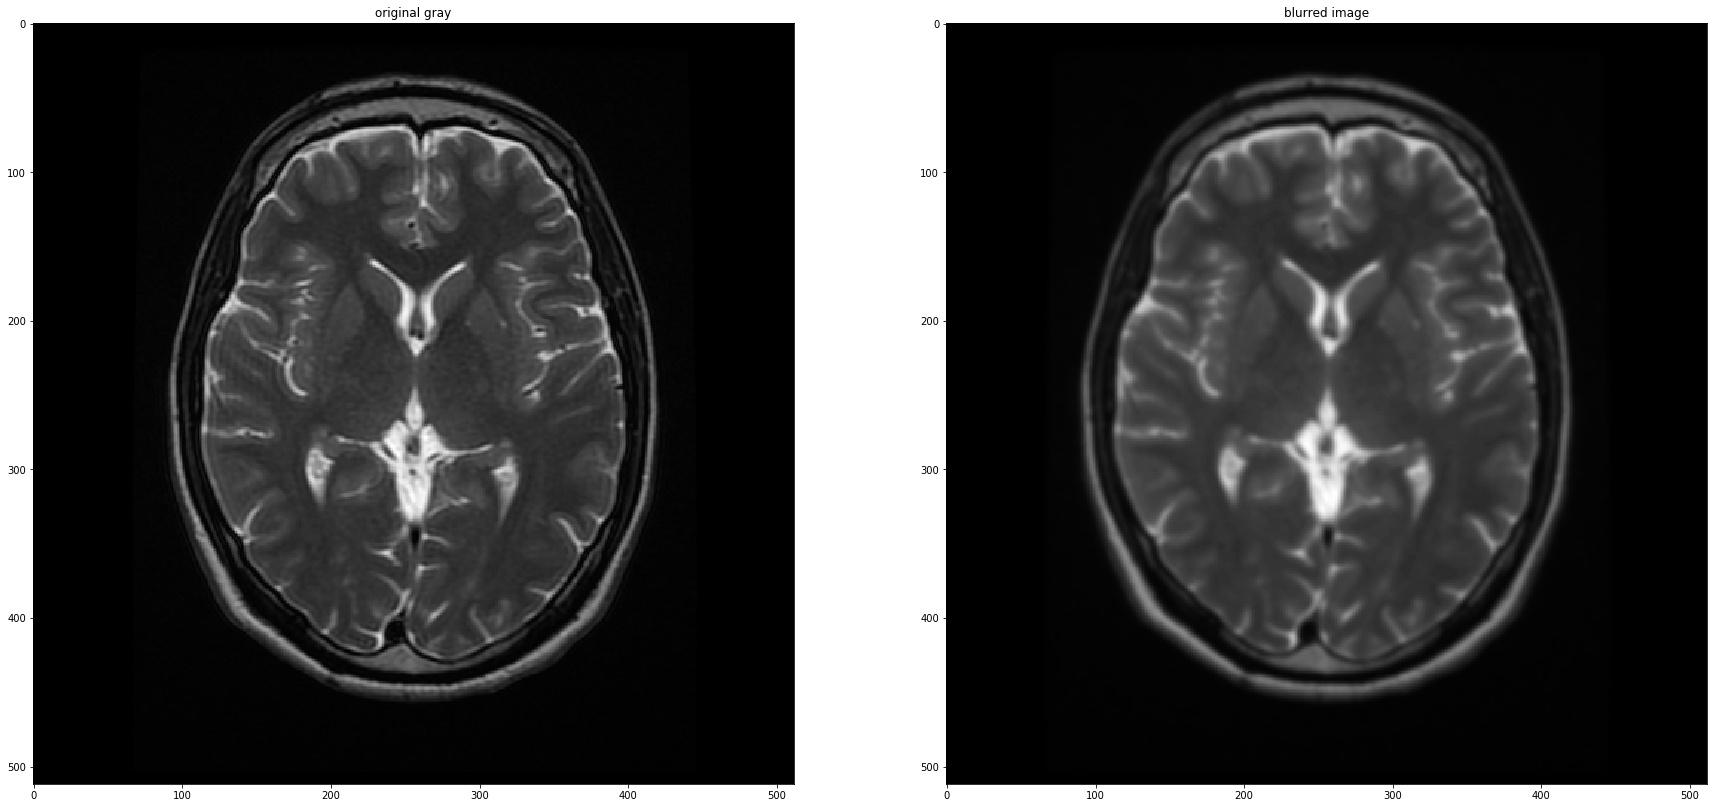

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,20))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

### Test performance with a high-pass filter

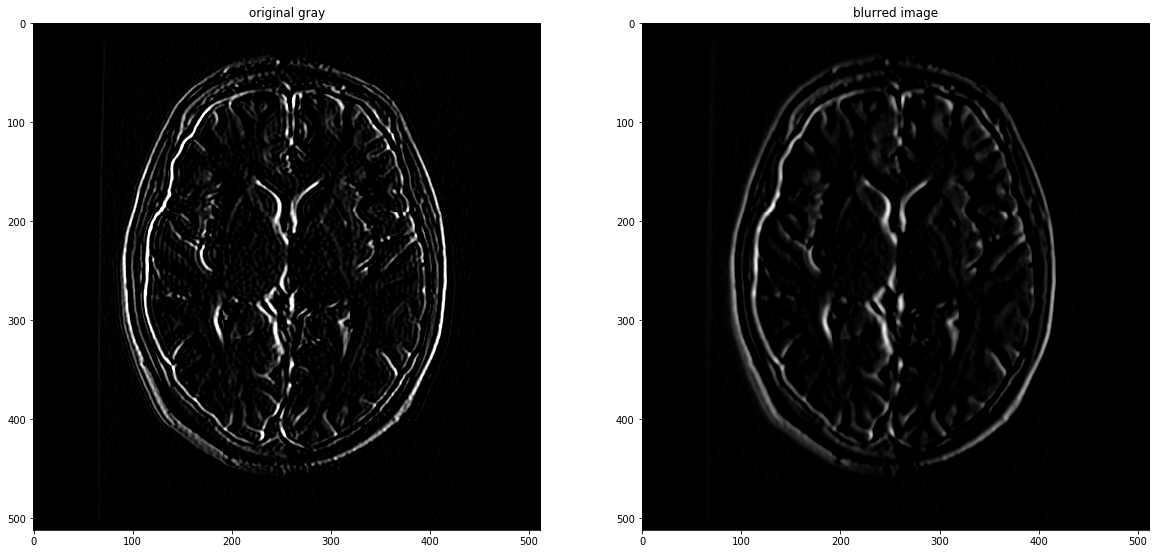

In [4]:
# High-pass filter 

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                    [ -2, 0, 2], 
                    [ -1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)
filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_x)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

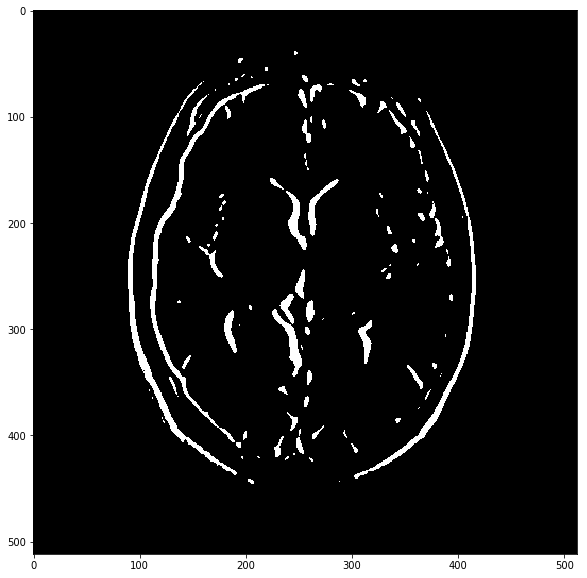

In [6]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY) # if pixel > 50 --> put it to 255

plt.figure(figsize=(15, 10))
plt.imshow(binary_image, cmap='gray')
